In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/take-home_exercise_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-11-5b870fab7552>:4: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gdrive/My Drive/take-home_exercise_data.csv')


In [12]:
na_percentage = df.isna().mean() * 100

# Display the percentage of NA values for each variable
print("Percentage of NA values in each variable:")
print(na_percentage)

Percentage of NA values in each variable:
Unnamed: 0                 75.972916
prospectid                 75.972916
ordernumber                75.972916
ordercreatedate            75.972916
regtenure                  75.972916
customer_type_group        75.972916
dnatestactivationdayid     82.943995
daystogetresult_grp        75.972916
dna_visittrafficsubtype    81.966669
xsell_gsa                  75.972916
xsell_day_exact            96.130081
day_create                  0.000000
dtype: float64


In [13]:
# Data cleaning
# Drop rows with missing values in specific columns
df = df.dropna(subset=['dna_visittrafficsubtype'])

# Convert date columns to datetime format
df['ordercreatedate'] = pd.to_datetime(df['ordercreatedate'], errors='coerce')
df['dnatestactivationdayid'] = pd.to_datetime(df['dnatestactivationdayid'], errors='coerce')

# Define a function to convert 'daystogetresult_grp' to days
def convert_to_days(x):
    if 'week' in x:
        if '>' in x:
            return int(x.split('week')[0].strip('>')) * 7 + 1  # Adjust for cases like '>10weeks'
        else:
            return int(x.split()[0]) * 7
    elif x == '-1':
        return -1
    else:
      return int(x)

# Apply the conversion function to 'daystogetresult_grp' column
df['daystogetresult_grp'] = df['daystogetresult_grp'].apply(convert_to_days)

# Convert 'xsell_day_exact' to numeric, handling errors
df['xsell_day_exact'] = pd.to_numeric(df['xsell_day_exact'], errors='coerce')

# Display the cleaned dataset head
print(df.head())

<ipython-input-13-df14860c9f5e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ordercreatedate'] = pd.to_datetime(df['ordercreatedate'], errors='coerce')


   Unnamed: 0   prospectid  ordernumber ordercreatedate  \
2         3.0  171965960.0  159656050.0      2016-11-25   
3         4.0  175522116.0  165370285.0      2017-03-08   
6         7.0  172404474.0  166005278.0      2017-03-19   
7         8.0  148805471.0  138025122.0      2015-08-07   
8         9.0   83821963.0  153455361.0      2016-07-14   

                regtenure customer_type_group dnatestactivationdayid  \
2      Order prior to reg             New Reg                    NaT   
3               <=60 days        Existing Reg                    NaT   
6              <=120 days        Existing Reg             2017-03-26   
7  More than 120 days old            Acom Sub             2015-08-20   
8  More than 120 days old            Acom Sub             2016-07-28   

   daystogetresult_grp dna_visittrafficsubtype  xsell_gsa  xsell_day_exact  \
2                   -1   Paid Search Non Brand        0.0              NaN   
3                   -1          Email Programs        0.

In [14]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

          Unnamed: 0    prospectid   ordernumber  daystogetresult_grp  \
count  189093.000000  1.890930e+05  1.890930e+05        189093.000000   
mean   126013.760911  1.211264e+08  1.511633e+08            21.097518   
std     72726.935051  5.191579e+07  1.137855e+07            21.436403   
min         3.000000  2.506000e+03  1.175387e+08            -1.000000   
25%     63108.000000  7.812688e+07  1.432837e+08            -1.000000   
50%    126084.000000  1.434796e+08  1.534194e+08            21.000000   
75%    189039.000000  1.673523e+08  1.601587e+08            35.000000   
max    251942.000000  1.793967e+08  1.666319e+08            71.000000   

           xsell_gsa  xsell_day_exact     day_create  
count  189093.000000     29448.000000  189093.000000  
mean        0.155733        69.672202       3.924201  
std         0.362603       136.157611       2.115742  
min         0.000000         0.000000       1.000000  
25%         0.000000         0.000000       2.000000  
50%         

In [15]:
# Define conditions for cross-sell
new_reg_conditions = (df['customer_type_group'] == 'New Reg') & (df['xsell_gsa'] == 1) & (df['xsell_day_exact'] <= 120)
existing_reg_conditions = (df['customer_type_group'] == 'Existing Reg') & (df['xsell_gsa'] == 1) & (df['xsell_day_exact'] <= 120)

# Cross-Sell Rate between New Registrations and ACOM Subscriptions
new_reg_cross_sell_rate = df[new_reg_conditions].shape[0] / df[df['customer_type_group'] == 'New Reg'].shape[0]

# Cross-Sell Rate between Existing Registrations and ACOM Subscriptions
existing_reg_cross_sell_rate = df[existing_reg_conditions].shape[0] / df[df['customer_type_group'] == 'Existing Reg'].shape[0]

# Overall Cross-Sell Rate
overall_cross_sell_rate = df[(df['xsell_gsa'] == 1) & (df['xsell_day_exact'] <= 120)].shape[0] / df.shape[0]

print(f"Cross-Sell Rate between New Registrations and ACOM Subscriptions: {new_reg_cross_sell_rate:.2%}")
print(f"Cross-Sell Rate between Existing Registrations and ACOM Subscriptions: {existing_reg_cross_sell_rate:.2%}")
print(f'Overall Cross-Sell Rate: {overall_cross_sell_rate:.2%}')

Cross-Sell Rate between New Registrations and ACOM Subscriptions: 15.46%
Cross-Sell Rate between Existing Registrations and ACOM Subscriptions: 18.42%
Overall Cross-Sell Rate: 13.18%


<ipython-input-25-7cba07028b76>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dna_visittrafficsubtype', y='xsell_gsa', data=df_top5, ci=None)


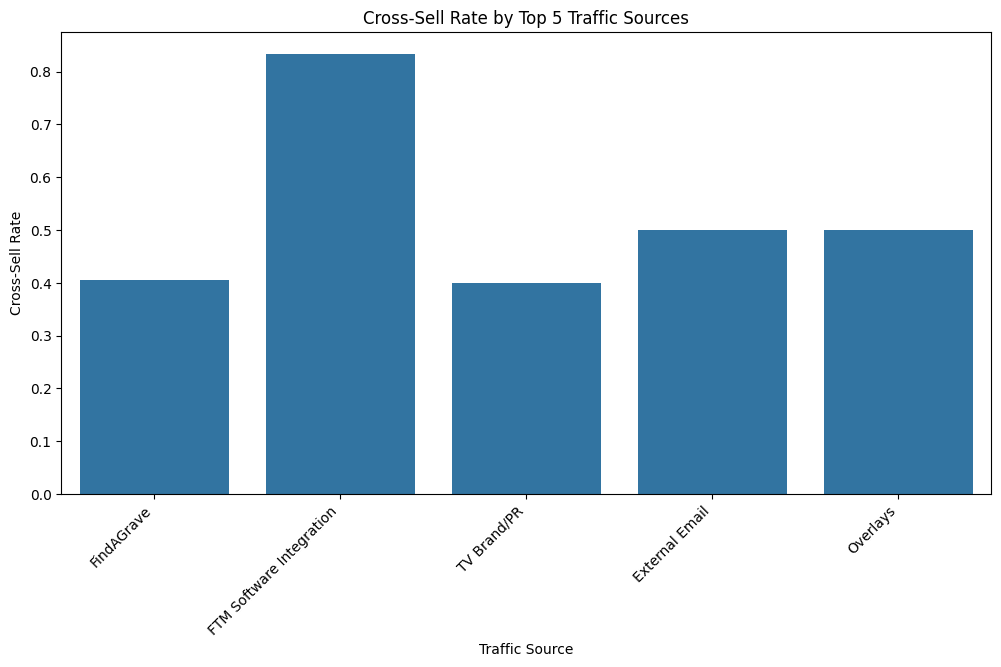

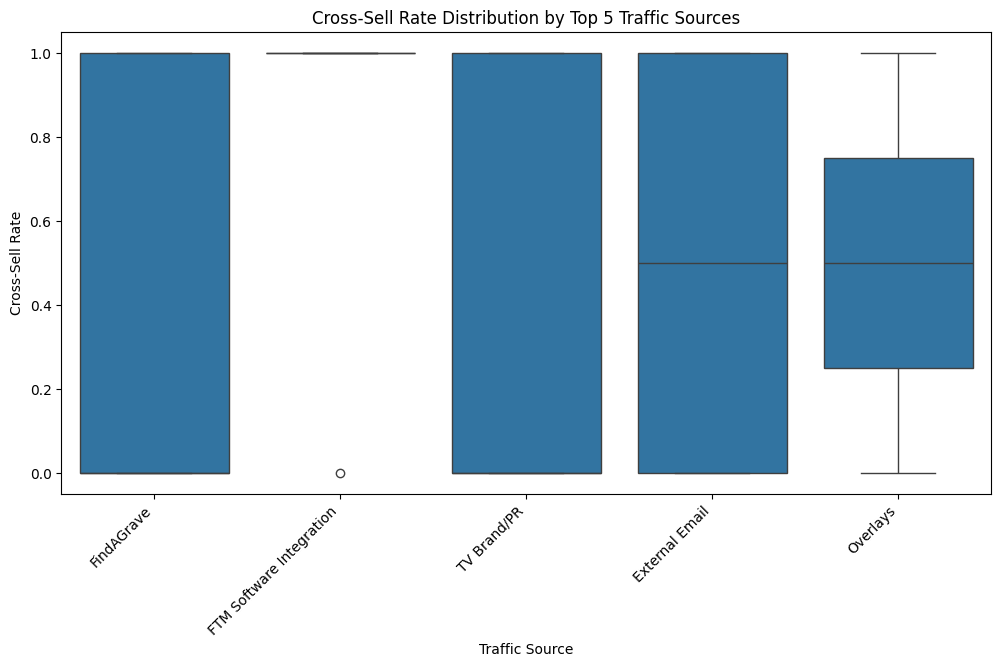

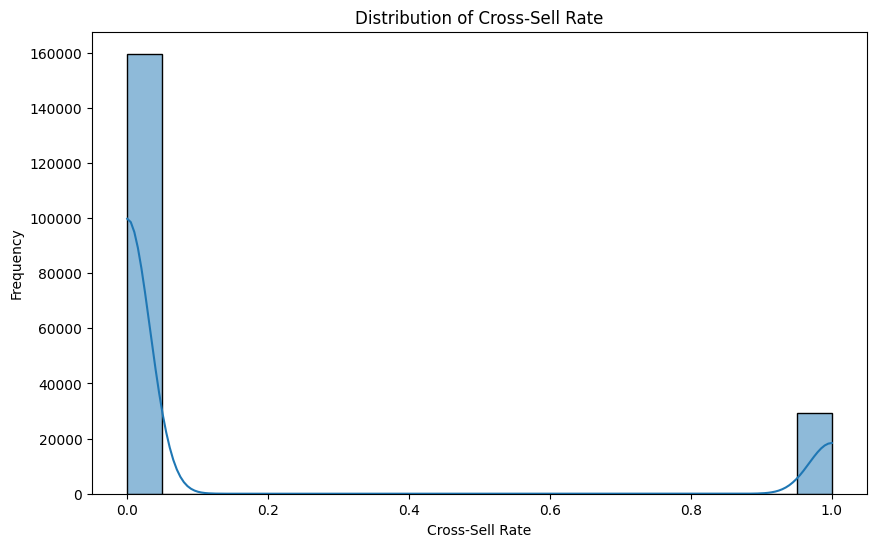

<ipython-input-25-7cba07028b76>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


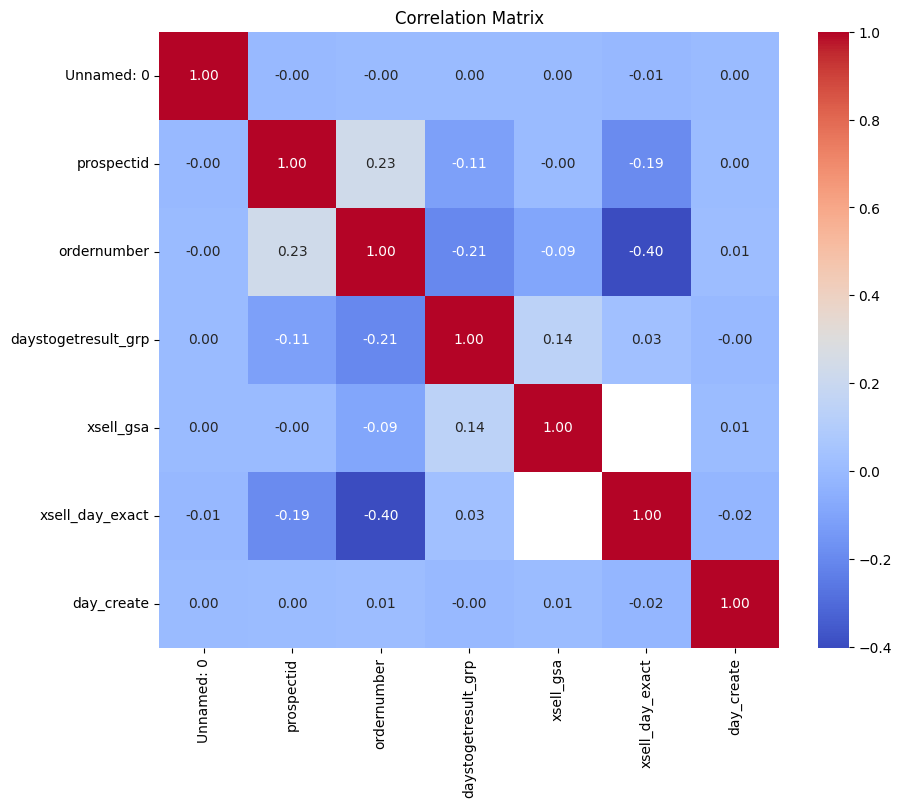

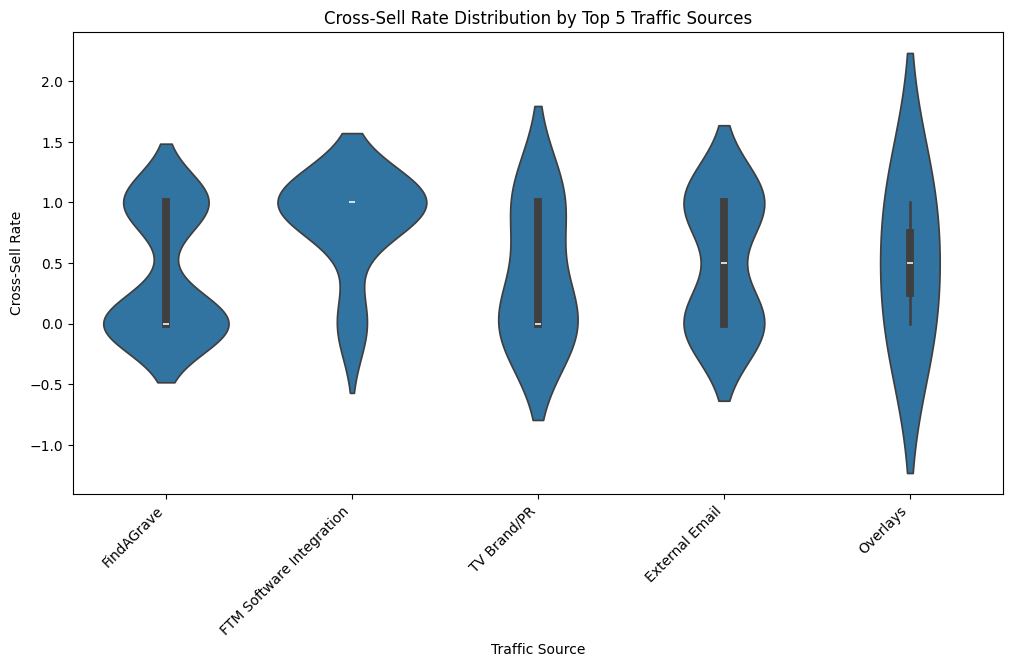

In [25]:
# EDA PLOTS

# Calculate Cross-Sell Rate by Traffic Source
traffic_source_cross_sell_rates = df.groupby('dna_visittrafficsubtype')['xsell_gsa'].mean()

# Select Top 5 Traffic Sources
top_traffic_sources = traffic_source_cross_sell_rates.sort_values(ascending=False).head(5).index

# Filter the DataFrame for Top 5 Traffic Sources
df_top5 = df[df['dna_visittrafficsubtype'].isin(top_traffic_sources)]

# 1. Create Bar Plot for Top 5 Traffic Sources
plt.figure(figsize=(12, 6))
sns.barplot(x='dna_visittrafficsubtype', y='xsell_gsa', data=df_top5, ci=None)
plt.title('Cross-Sell Rate by Top 5 Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Cross-Sell Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Plot for Cross-Sell Rate by Traffic Source (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='dna_visittrafficsubtype', y='xsell_gsa', data=df_top5)
plt.title('Cross-Sell Rate Distribution by Top 5 Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Cross-Sell Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Plot for Cross-Sell Rate Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['xsell_gsa'], bins=20, kde=True)
plt.title('Distribution of Cross-Sell Rate')
plt.xlabel('Cross-Sell Rate')
plt.ylabel('Frequency')
plt.show()

# 4. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 5. Violin Plot for Cross-Sell Rate Distribution by Traffic Source
plt.figure(figsize=(12, 6))
sns.violinplot(x='dna_visittrafficsubtype', y='xsell_gsa', data=df_top5)
plt.title('Cross-Sell Rate Distribution by Top 5 Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Cross-Sell Rate')
plt.xticks(rotation=45, ha='right')
plt.show()